# Data Set generation for detection of pilot contamination in multi user Massive MIMO Systems

This notebook provides the code that generates the dataset based on SNR values and transmit power at the eavesdropper.

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
from comm import qpskmodulator, awgn

In [2]:
def razaoMatrizR(Y, L, M=128, SNR=20, potenciaSinal=1, verbose=False):
    
    # OBTENDO A POTENCIA DO RUIDO N0
    N0 = potenciaSinal/(10**(SNR/10))
    
    # CRIANDO A MATRIZ IDENTIDADE E FAZENDO A OPERACAO HERMITIANA EM Y
    I  = np.identity(L)
    YH = np.conjugate(Y).T
    
    # CONSTRUINDO A MATRIZ R
    R = np.matmul(YH, Y)/M - N0 * I
    
    # DOIS MAIORES AUTOVALORES
    autovalores = np.sort(np.linalg.eigvals(R))
    a1 = autovalores[-1]
    a2 = autovalores[-2]
    
    if verbose:
        print("R:", np.matrix(R))
        print("\nAutovalores:", autovalores)
        print("\nMaior autovalor:", a1)
        print("\nSegundo maior autovalor:", a2)
        print("\nRazão:", (a1/a2).real)
    
    # RETORNO A RAZAO
    return (a1/a2)

### System Parameters

In [4]:
nAntennas            = 200 #qtd de antenas na estacao base
nUsers               = 1 #qtd de usuarios conectados na rede
nEves                = 1 #qtd de espioes 
nBitsPerSymbol       = 2 #QPSK
nTrials              = 100 #repetibilidade de cada iteracao
usr_power            = 1 # potencia dos usuarios
nPilotSymbols_values = np.arange(5, 101, 10) #range de qtd de simbolos na sequencia piloto que quero testar
eve_power_values     = np.arange(0, 5.1, 0.5) #range de potencia do espiao que quero testar
snr_values           = np.arange(0, 31) #range de snrs que quero testar

# Valores para teste
snr_values           = np.arange(-10, 12, 2) #range de snrs que quero testar
nPilotSymbols_values = np.arange(4, 5)
eve_power_values     = np.arange(1, 2)
thr = 50


## Simulates MIMO Channel Fading with AWGN

In [5]:
# LAYOUT DO PRINT
status_message = 'Trial {}: nPilotSymbols={}, snr={}, eve_power={}'
ratio = np.zeros(shape=(len(snr_values)))
detected = np.zeros(snr_values.shape)

for nPilotSymbols in nPilotSymbols_values:

    # PRA CADA SNR
    for i, snr in enumerate(snr_values):

        # PRA CADA POTENCIA DO ESPIAO
        for eve_power in eve_power_values:

            # REPETIBILIDADE
            for trial in range(nTrials):

                # PRINT
                print(status_message.format(trial+1, nPilotSymbols, snr, eve_power))

                # SIMULANDO OS CANAIS DO USUARIO E DO ESPIAO
                Haut = np.sqrt(0.5)*(np.random.normal(0, 1, size=(nAntennas, nUsers)) + 1j*np.random.normal(0, 1, size=(nAntennas, nUsers)))
                g    = np.sqrt(0.5)*(np.random.normal(0, 1, size=(nAntennas, nEves)) + 1j*np.random.normal(0, 1, (nAntennas, nEves)))
                
                # SEQUENCIA PILOTO ALEATORIA + MODULACAO PARA TODOS OS USUARIOS:
                bitStream = np.random.choice([0, 1], nPilotSymbols*nBitsPerSymbol*nUsers)
                symb      = qpskmodulator(bitStream) # QPSK Modulator
                xp        = symb.reshape(nUsers, nPilotSymbols)

                # ESPIAO ENTRANDO NA JOGADA (SE A POTENCIA DELE FOR 0 ELE NAO ENTRA NA JOGADA):
                xpe        = np.sqrt(eve_power)*xp[0, :] #xpe vai ser a sequencia piloto do primeiro usuario multiplicada pela raiz da potencia do espiao
                xptx       = np.concatenate((xp, [xpe])) #xptx sera a matriz xp com uma linha a mais: xpe
                H          = np.concatenate((Haut, g), axis=1) #H vai ser Haut com uma COLUNA a mais, que vai ser g
                
                # TRANSMISSAO PELO CANAL
                yp = np.dot(H, xptx) # fading
                yp = awgn(yp, SNR=snr) #ruido branco

                # Detecção
                ratio_now = razaoMatrizR(yp, nPilotSymbols, M=nAntennas, SNR=snr)
                ratio[i] = ratio[i] + ratio_now
                detected[i] = detected[i] + (ratio_now > thr)

                # Flag to determine the target in the data set
                if eve_power == 0:
                    contamination = 0
                else:
                    contamination = 1

ratio = ratio/nTrials
P = detected/nTrials

Trial 1: nPilotSymbols=4, snr=-10, eve_power=1
Trial 2: nPilotSymbols=4, snr=-10, eve_power=1
Trial 3: nPilotSymbols=4, snr=-10, eve_power=1
Trial 4: nPilotSymbols=4, snr=-10, eve_power=1
Trial 5: nPilotSymbols=4, snr=-10, eve_power=1
Trial 6: nPilotSymbols=4, snr=-10, eve_power=1
Trial 7: nPilotSymbols=4, snr=-10, eve_power=1
Trial 8: nPilotSymbols=4, snr=-10, eve_power=1
Trial 9: nPilotSymbols=4, snr=-10, eve_power=1
Trial 10: nPilotSymbols=4, snr=-10, eve_power=1
Trial 11: nPilotSymbols=4, snr=-10, eve_power=1
Trial 12: nPilotSymbols=4, snr=-10, eve_power=1
Trial 13: nPilotSymbols=4, snr=-10, eve_power=1
Trial 14: nPilotSymbols=4, snr=-10, eve_power=1
Trial 15: nPilotSymbols=4, snr=-10, eve_power=1
Trial 16: nPilotSymbols=4, snr=-10, eve_power=1
Trial 17: nPilotSymbols=4, snr=-10, eve_power=1
Trial 18: nPilotSymbols=4, snr=-10, eve_power=1
Trial 19: nPilotSymbols=4, snr=-10, eve_power=1
Trial 20: nPilotSymbols=4, snr=-10, eve_power=1
Trial 21: nPilotSymbols=4, snr=-10, eve_power=1
T

c:\users\pedro ivo\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:40: ComplexWarning: Casting complex values to real discards the imaginary part


Trial 18: nPilotSymbols=4, snr=-8, eve_power=1
Trial 19: nPilotSymbols=4, snr=-8, eve_power=1
Trial 20: nPilotSymbols=4, snr=-8, eve_power=1
Trial 21: nPilotSymbols=4, snr=-8, eve_power=1
Trial 22: nPilotSymbols=4, snr=-8, eve_power=1
Trial 23: nPilotSymbols=4, snr=-8, eve_power=1
Trial 24: nPilotSymbols=4, snr=-8, eve_power=1
Trial 25: nPilotSymbols=4, snr=-8, eve_power=1
Trial 26: nPilotSymbols=4, snr=-8, eve_power=1
Trial 27: nPilotSymbols=4, snr=-8, eve_power=1
Trial 28: nPilotSymbols=4, snr=-8, eve_power=1
Trial 29: nPilotSymbols=4, snr=-8, eve_power=1
Trial 30: nPilotSymbols=4, snr=-8, eve_power=1
Trial 31: nPilotSymbols=4, snr=-8, eve_power=1
Trial 32: nPilotSymbols=4, snr=-8, eve_power=1
Trial 33: nPilotSymbols=4, snr=-8, eve_power=1
Trial 34: nPilotSymbols=4, snr=-8, eve_power=1
Trial 35: nPilotSymbols=4, snr=-8, eve_power=1
Trial 36: nPilotSymbols=4, snr=-8, eve_power=1
Trial 37: nPilotSymbols=4, snr=-8, eve_power=1
Trial 38: nPilotSymbols=4, snr=-8, eve_power=1
Trial 39: nPi

Trial 58: nPilotSymbols=4, snr=-2, eve_power=1
Trial 59: nPilotSymbols=4, snr=-2, eve_power=1
Trial 60: nPilotSymbols=4, snr=-2, eve_power=1
Trial 61: nPilotSymbols=4, snr=-2, eve_power=1
Trial 62: nPilotSymbols=4, snr=-2, eve_power=1
Trial 63: nPilotSymbols=4, snr=-2, eve_power=1
Trial 64: nPilotSymbols=4, snr=-2, eve_power=1
Trial 65: nPilotSymbols=4, snr=-2, eve_power=1
Trial 66: nPilotSymbols=4, snr=-2, eve_power=1
Trial 67: nPilotSymbols=4, snr=-2, eve_power=1
Trial 68: nPilotSymbols=4, snr=-2, eve_power=1
Trial 69: nPilotSymbols=4, snr=-2, eve_power=1
Trial 70: nPilotSymbols=4, snr=-2, eve_power=1
Trial 71: nPilotSymbols=4, snr=-2, eve_power=1
Trial 72: nPilotSymbols=4, snr=-2, eve_power=1
Trial 73: nPilotSymbols=4, snr=-2, eve_power=1
Trial 74: nPilotSymbols=4, snr=-2, eve_power=1
Trial 75: nPilotSymbols=4, snr=-2, eve_power=1
Trial 76: nPilotSymbols=4, snr=-2, eve_power=1
Trial 77: nPilotSymbols=4, snr=-2, eve_power=1
Trial 78: nPilotSymbols=4, snr=-2, eve_power=1
Trial 79: nPi

Trial 23: nPilotSymbols=4, snr=6, eve_power=1
Trial 24: nPilotSymbols=4, snr=6, eve_power=1
Trial 25: nPilotSymbols=4, snr=6, eve_power=1
Trial 26: nPilotSymbols=4, snr=6, eve_power=1
Trial 27: nPilotSymbols=4, snr=6, eve_power=1
Trial 28: nPilotSymbols=4, snr=6, eve_power=1
Trial 29: nPilotSymbols=4, snr=6, eve_power=1
Trial 30: nPilotSymbols=4, snr=6, eve_power=1
Trial 31: nPilotSymbols=4, snr=6, eve_power=1
Trial 32: nPilotSymbols=4, snr=6, eve_power=1
Trial 33: nPilotSymbols=4, snr=6, eve_power=1
Trial 34: nPilotSymbols=4, snr=6, eve_power=1
Trial 35: nPilotSymbols=4, snr=6, eve_power=1
Trial 36: nPilotSymbols=4, snr=6, eve_power=1
Trial 37: nPilotSymbols=4, snr=6, eve_power=1
Trial 38: nPilotSymbols=4, snr=6, eve_power=1
Trial 39: nPilotSymbols=4, snr=6, eve_power=1
Trial 40: nPilotSymbols=4, snr=6, eve_power=1
Trial 41: nPilotSymbols=4, snr=6, eve_power=1
Trial 42: nPilotSymbols=4, snr=6, eve_power=1
Trial 43: nPilotSymbols=4, snr=6, eve_power=1
Trial 44: nPilotSymbols=4, snr=6, 

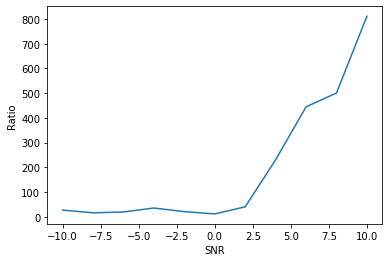

In [6]:
plt.figure
plt.plot(snr_values, ratio)
plt.xlabel('SNR')
plt.ylabel('Ratio')
plt.show()

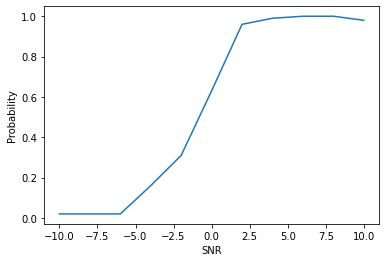

In [7]:
plt.figure
plt.plot(snr_values, P)
plt.xlabel('SNR')
plt.ylabel('Probability')
plt.show()